# HypRadon
The adjoint test for the hyperbolic Radon transform operator implemented with the log-polar coordinates

In [1]:
import numpy as np
import hypRadon
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Specify the range of variable in time-offest (t,x) and hyperbolic (tau,q) domains

In [3]:
N = 512
Nx = N
Nt = N 
Nq = N 
Ntau = N 
T0 = 0 
T1 = 4 
X1 = 5 
t = T0+np.arange(Nt)/float(Nt)*(T1-T0)
x = arange(0,Nx)/float(Nx)*X1
q = 0.3+np.arange(0,Nq)/float(Nq)*0.8
tau = T0+np.arange(0,Ntau)/float(Ntau)*(T1-T0)
[t,x] = np.meshgrid(t,x);
[q,tau] = np.meshgrid(q,tau)

Generate a synthetic data set (hyperbolas):

In [4]:
f = np.zeros([Nx,Nt],dtype=float32)
rickh = lambda t,cent,a: (1-2*pi**2*a**2*t**2)*exp(-pi**2*a**2*t**2)
ql = array([0.6,0.6,0.6,0.6,0.6,0.5,0.45,0.7])*amax(q)
tl = array([0.1,0.3,0.5,0.65,0.8,0.3,0.5,0.5])*(T1-T0)+T0
for l in range(0,8):
    for j in range(0,Nx):
        f[j,:] = f[j,:] + rickh(t[0,:]-sqrt(tl[l]**2+ql[l]**2*x[j,0]**2),tl[l],6);
f = f*(t[0,1]-t[0,0]);
v = ones([Nx,Nt],dtype=float32)
v[:,-16:] = tile(cos(linspace(0,1,16)*pi/2),[Nx,1])
f = f*v;

Plot the tranposed data

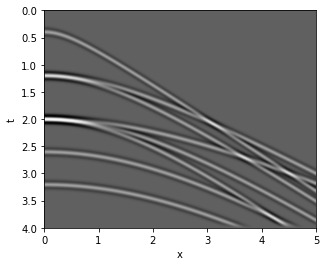

In [5]:
plt.imshow(np.transpose(f),extent=(0,5,4,0), cmap='Greys_r')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

Specify the size of the log-polar grid (this has to be investigated, as well as additional splitting performed to solve the problem of small values t)

In [6]:
Ntheta = 512
Nrho = 512

Create a hypRadon class with precomputed parameters and GPU memory allocated

In [7]:
cl = hypRadon.hypRadon(t,x,q,tau,1,Ntheta,Nrho)# 1 - number of seismograms for simultenious processing

Hint: To test perfoemnace, use several seismograms for simultaneous processing,array f must be 3D for this case

Evaluate the forward operator for the hyperbolic Radon transoform

In [8]:
R = cl.fwd(f)

Plot the result

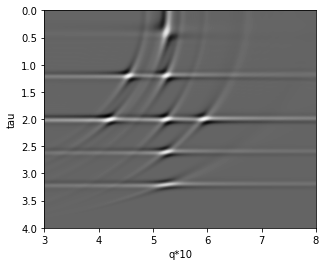

In [9]:
plt.imshow(R,extent=(3,8,4,0), cmap='Greys_r')
plt.ylabel('tau')
plt.xlabel('q*10')
plt.show()

Apply the adjoint operator to the result above

In [10]:
fa = cl.adj(R)

Plot the result

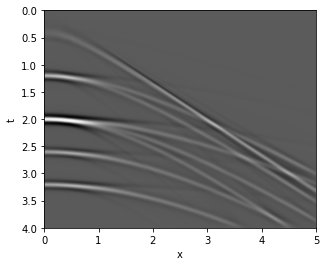

In [11]:
plt.imshow(np.transpose(fa),extent=(0,5,4,0), cmap='Greys_r')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

Adjoint test

In [12]:
(sum(fa*f)-sum(R*R))/sum(R*R)

-3.003167e-07